In [1]:
#Import the data and necessary libraries
import types
from botocore.client import Config
import ibm_boto3
import pandas as pd

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_7da32595b948463b99a074a64c68d89d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='oWauawtjnaYH1PhvGunivOtDCwjlK_MGJuejwzF_xlVF',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_7da32595b948463b99a074a64c68d89d.get_object(Bucket='predictinglifeexpectancy-donotdelete-pr-zfjumqstpxwhbb',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

life_data = pd.read_csv(body)
life_data.head()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Drop the country column
life_data = life_data.drop('Country', axis = 1)

In [3]:

life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null float64
GDP                                2490 non-nul

In [4]:
life_data.columns.values

array(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'], dtype=object)

In [5]:
cloumn_n=['Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure',
       'Hepatitis B', 'Measles', 'BMI', 'Under-five deaths', 'Polio',
       'Total expenditure', 'Diphtheria ', 'HIV/AIDS', 'GDP',
       'Population', 'Thinness 1-19 years', 'Thinness 5-9 years',
       'Income composition of resources', 'Schooling']

In [6]:
life_data.columns=cloumn_n

In [7]:
cloumn_n2=['Year', 'Status', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure',
       'Hepatitis B', 'Measles', 'BMI', 'Under-five deaths', 'Polio',
       'Total expenditure', 'Diphtheria ', 'HIV/AIDS', 'GDP',
       'Population', 'Thinness 1-19 years', 'Thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Life expectancy']

In [8]:
life_data=life_data[cloumn_n2]

In [9]:
#data preprocessing
life_data = life_data.dropna(axis = 0, subset = ['Life expectancy'])
life_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 21 columns):
Year                               2928 non-null int64
Status                             2928 non-null object
Adult mortality                    2928 non-null float64
Infant deaths                      2928 non-null int64
Alcohol                            2735 non-null float64
Percentage expenditure             2928 non-null float64
Hepatitis B                        2375 non-null float64
Measles                            2928 non-null int64
BMI                                2896 non-null float64
Under-five deaths                  2928 non-null int64
Polio                              2909 non-null float64
Total expenditure                  2702 non-null float64
Diphtheria                         2909 non-null float64
HIV/AIDS                           2928 non-null float64
GDP                                2485 non-null float64
Population                         2284 non-nul

In [10]:
life_data.mean()

Year                               2.007500e+03
Adult mortality                    1.647964e+02
Infant deaths                      3.040745e+01
Alcohol                            4.614856e+00
Percentage expenditure             7.403212e+02
Hepatitis B                        8.096084e+01
Measles                            2.427856e+03
BMI                                3.823539e+01
Under-five deaths                  4.217930e+01
Polio                              8.254830e+01
Total expenditure                  5.930163e+00
Diphtheria                         8.232142e+01
HIV/AIDS                           1.747712e+00
GDP                                7.494211e+03
Population                         1.276454e+07
Thinness 1-19 years                4.850622e+00
Thinness 5-9 years                 4.881423e+00
Income composition of resources    6.274187e-01
Schooling                          1.199964e+01
Life expectancy                    6.922493e+01
dtype: float64

In [11]:
life_data = life_data.fillna(life_data.mean())
life_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 21 columns):
Year                               2928 non-null int64
Status                             2928 non-null object
Adult mortality                    2928 non-null float64
Infant deaths                      2928 non-null int64
Alcohol                            2928 non-null float64
Percentage expenditure             2928 non-null float64
Hepatitis B                        2928 non-null float64
Measles                            2928 non-null int64
BMI                                2928 non-null float64
Under-five deaths                  2928 non-null int64
Polio                              2928 non-null float64
Total expenditure                  2928 non-null float64
Diphtheria                         2928 non-null float64
HIV/AIDS                           2928 non-null float64
GDP                                2928 non-null float64
Population                         2928 non-nul

In [12]:
life_data.head()

,Year,Status,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [13]:
life_data.isnull().sum()

Year                               0
Status                             0
Adult mortality                    0
Infant deaths                      0
Alcohol                            0
Percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness 1-19 years                0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
Life expectancy                    0
dtype: int64

In [14]:
life_data['Status'] = life_data['Status'].map({'Developing' : 0, 'Developed' : 1})

In [15]:
life_data.head()

,Year,Status,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,2015,0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,2014,0,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,2013,0,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,2012,0,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,2011,0,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [16]:
x=life_data.iloc[:,0:-1].values
y=life_data.iloc[:,-1:].values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
#Split the data as train and test
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
print("Train data size =",xtrain.shape,ytrain.shape,"\nTest data size =",xtest.shape,ytest.shape)

Train data size = (2342, 20) (2342, 1) 
Test data size = (586, 20) (586, 1)


In [20]:
#Random forest regression 
from sklearn.ensemble import RandomForestRegressor

In [21]:
regressor=RandomForestRegressor(n_estimators=200,random_state=0)

In [22]:
regressor.fit(xtrain,ytrain)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [23]:
regressor.score(xtrain, ytrain)

0.9947189296450958

In [24]:
#test the model
pred = regressor.predict(xtest)
pred

array([65.2545, 56.0145, 53.846 , 75.564 , 73.042 , 73.728 , 56.389 ,
       61.927 , 70.8805, 73.122 , 73.325 , 74.0325, 71.147 , 73.1995,
       76.1135, 62.3   , 74.1585, 62.637 , 57.1235, 68.796 , 73.0245,
       63.1215, 77.3785, 66.231 , 75.8035, 76.1035, 57.9225, 72.5785,
       73.441 , 53.957 , 67.644 , 83.9185, 73.206 , 64.534 , 53.5725,
       69.7985, 52.9795, 74.602 , 76.623 , 74.2565, 54.2515, 73.8485,
       79.014 , 56.252 , 74.514 , 74.8445, 73.5575, 47.6695, 81.3645,
       73.7795, 82.422 , 66.2575, 77.446 , 62.545 , 59.487 , 82.1855,
       66.4365, 72.57  , 55.9465, 68.786 , 79.8465, 82.6195, 47.988 ,
       74.2755, 75.316 , 53.6135, 55.2725, 72.794 , 56.859 , 81.62  ,
       71.8745, 75.0435, 69.662 , 72.5265, 74.2505, 65.7645, 72.2095,
       66.369 , 81.766 , 66.6545, 82.178 , 73.5005, 76.128 , 53.5695,
       72.9455, 65.281 , 82.868 , 57.8745, 72.2135, 53.8265, 60.6295,
       70.5315, 75.295 , 74.9355, 63.3645, 72.9255, 67.936 , 52.12  ,
       73.0755, 53.6

In [25]:
regressor.score(xtest, ytest)

0.954122605058611

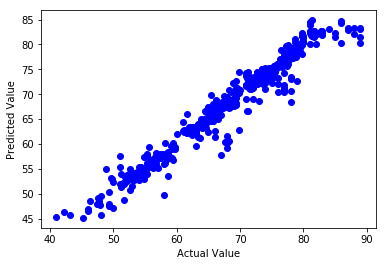

In [26]:
plt.scatter(ytest,pred,color="blue")
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

In [27]:
pred=np.reshape(pred,(586,1))

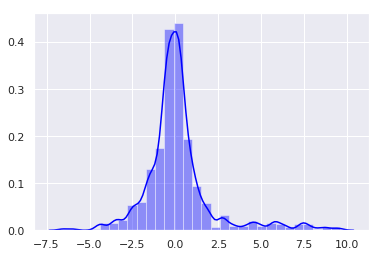

In [28]:
sns.set()
sns.distplot((ytest-pred),bins=30,color="blue")


In [29]:
from sklearn import metrics

In [30]:
print('MAE:', metrics.mean_absolute_error(ytest, pred))
print('MSE:', metrics.mean_squared_error(ytest, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, pred)))

MAE: 1.2236680887371985
MSE: 4.098889064419796
RMSE: 2.024571328558171


In [31]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-27 17:52:54,209 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [32]:
wml_cred ={
  "apikey": "Cr58cGUR-w6TjvFJQYqdGV81ccW6apTBwtUX5PsP_5g-",
  "iam_apikey_description": "Auto-generated for key 3f13644a-49a9-4257-a289-5c72c249d0b8",
  "iam_apikey_name": "Service credentials-2",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/8e670d1f062f43dd8663f2636d6f8603::serviceid:ServiceId-2bd082c8-96c5-4583-96ef-111cdd7a0902",
  "instance_id": "2d6fc3d0-3802-47c1-b276-b012fc946ce2",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [33]:
client=WatsonMachineLearningAPIClient(wml_cred)

In [34]:
metadata={
    client.repository.ModelMetaNames.AUTHOR_NAME:"Nikhil V",
    client.repository.ModelMetaNames.AUTHOR_EMAIL:"SI05202001130@smartinternz.com",
    client.repository.ModelMetaNames.NAME:"Predicting life expectancy"
}

In [35]:
stored_data=client.repository.store_model(regressor,meta_props=metadata)

In [36]:
stored_data

{'metadata': {'guid': '004e3f70-8bea-44b2-892c-4f1091e62316',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/2d6fc3d0-3802-47c1-b276-b012fc946ce2/published_models/004e3f70-8bea-44b2-892c-4f1091e62316',
  'created_at': '2020-06-27T17:52:54.725Z',
  'modified_at': '2020-06-27T17:52:54.789Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'learning_configuration_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/2d6fc3d0-3802-47c1-b276-b012fc946ce2/published_models/004e3f70-8bea-44b2-892c-4f1091e62316/learning_configuration',
  'author': {'name': 'Nikhil V'},
  'name': 'Predicting life expectancy',
  'learning_iterations_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/2d6fc3d0-3802-47c1-b276-b012fc946ce2/published_models/004e3f70-8bea-44b2-892c-4f1091e62316/learning_iterations',
  'feedback_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/2d6fc3d0-3802-47c1-b276-b012fc946ce2/published_models/004e3f70-8bea-44b2-892c-4f1091e62316/feedback',
  'latest_version

In [37]:
guid=client.repository.get_model_uid(stored_data)

In [38]:
guid

'004e3f70-8bea-44b2-892c-4f1091e62316'

In [39]:
deploy=client.deployments.create(guid)



#######################################################################################

Synchronous deployment creation for uid: '004e3f70-8bea-44b2-892c-4f1091e62316' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='5ffc6d65-4e54-4f1b-95f3-2e2d70ad272a'
------------------------------------------------------------------------------------------------




In [40]:
client.deployments.list()

------------------------------------  -------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                 TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
5ffc6d65-4e54-4f1b-95f3-2e2d70ad272a  Artifact deployment  online  DEPLOY_SUCCESS  2020-06-27T17:53:09.947Z  scikit-learn-0.20  model
8d2f6ad7-4d4d-44b1-9a86-9e540342d889  Artifact deployment  online  DEPLOY_SUCCESS  2020-06-25T07:55:38.552Z  scikit-learn-0.20  model
3a8fba05-c74b-433f-a68f-0a856441aa32  Artifact deployment  online  DEPLOY_SUCCESS  2020-06-23T04:04:00.846Z  scikit-learn-0.20  model
6dad683d-8a17-41f5-96df-e4e6bb3561d4  Artifact deployment  online  DEPLOY_SUCCESS  2020-06-21T18:13:55.617Z  scikit-learn-0.20  model
d3e5c8bc-3a35-4ff9-be2b-01efd9003c09  Artifact deployment  online  DEPLOY_SUCCESS  2020-06-14T12:41:02.388Z  scikit-learn-0.20  model
------------------------------------  --------

In [41]:
deploy

{'metadata': {'guid': '5ffc6d65-4e54-4f1b-95f3-2e2d70ad272a',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/2d6fc3d0-3802-47c1-b276-b012fc946ce2/deployments/5ffc6d65-4e54-4f1b-95f3-2e2d70ad272a',
  'created_at': '2020-06-27T17:53:09.947Z',
  'modified_at': '2020-06-27T17:53:10.259Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'name': 'Artifact deployment',
  'scoring_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/2d6fc3d0-3802-47c1-b276-b012fc946ce2/deployments/5ffc6d65-4e54-4f1b-95f3-2e2d70ad272a/online',
  'deployable_asset': {'name': 'Predicting life expectancy',
   'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/2d6fc3d0-3802-47c1-b276-b012fc946ce2/published_models/004e3f70-8bea-44b2-892c-4f1091e62316',
   'guid': '004e3f70-8bea-44b2-892c-4f1091e62316',
   'created_at': '2020-06-27T17:53:09.920Z',
   'type': 'model'},
  'description': 'Description of deployment',
  'status_details': {'status': 'DEPLOY_SUCCESS'},
  'model_type': 'scikit-learn-0.2

In [42]:
scoring_endpoint=client.deployments.get_scoring_url(deploy)

In [43]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/2d6fc3d0-3802-47c1-b276-b012fc946ce2/deployments/5ffc6d65-4e54-4f1b-95f3-2e2d70ad272a/online'